# This notebook contains the code and figures for the data from measuring display latencies

What data do we have?

    A. Light intensity over time
    B. (A) for multiple trials
    C. (B) for different frame rate (FR), resolution, and modes
    D. (C) for different monitor/projector

What information to extract?

    A. How light is being shone by the monitor/projector in every trial
    B. How does the latency changes over time
    C. Distribution of light intensity for the whole experiment - histogram of (A)
    D. Distribution of latencies for the whole experiment
    E. (A, B, C, and D) across different FR, resolution, modes
    F. (A, B, C, and D) across different monitors (For the same FR, resolution, modes)
    G. Mean latency versus FR across across different monitors
    H. Mean latency versus Resolution across different monitors
    
Related to our device: 

    I. What is the sampling frequency of our device

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

import vrlatency as vrl

## Import Data

In [2]:
path_data = "../Measurement/display"
path_fig = "../../Figures/display/"

os.chdir(path_data)

In [3]:
df_data_all = pd.DataFrame()
df_params_all = pd.DataFrame()

for ind, filename in enumerate(glob.glob('*.{}'.format('csv'))):
    name = filename.split('.')[0]
    [exp_type, date, time] = name.split('_')
    print(ind, exp_type, date, time)
    
    df_data = vrl.read_csv(filename)
    df_data['Session'] = [ind] * df_data.shape[0]
    params = vrl.read_params(filename)
    params = {key: [value] for key, value in params.items()}
    df_params = pd.DataFrame(params)
    df_params['Session'] = ind
    df_params['Filename'] = '_'.join([exp_type, date, time])
    
    df_data_all = df_data_all.append(df_data)
    df_params_all = df_params_all.append(df_params)

0 display 20180830 115317
1 display 20180830 123133
2 display 20180830 123445
3 display 20180830 124007
4 display 20180830 124242
5 display 20180830 175009
6 display 20180830 175220
7 display 20180830 175249
8 display 20180830 175922
9 display 20180830 175944
10 display 20180830 175957
11 display 20180830 180145
12 display 20180830 180216
13 display 20180830 180339
14 display 20180830 180657
15 display 20180830 181301
16 display 20180830 181639
17 display 20180830 182344
18 display 20180830 182735
19 display 20180830 183236
20 display 20180830 183706
21 display 20180830 184108
22 display 20180830 184346
23 display 20180830 184633
24 display 20180830 184938
25 display 20180830 185858
26 display 20180830 190230
27 display 20180830 191215


In [4]:
df_data_all.tail()

,Trial,Time,SensorBrightness,Session
199995,1001,143434284,604,27
199996,1001,143434556,606,27
199997,1001,143434828,604,27
199998,1001,143435100,604,27
199999,1001,143435372,606,27


In [5]:
df_params_all.head()

,Experiment,Date,Time,Width,Height,Depth,Rate,Monitors,Trials,Session,Filename
0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,0,display_20180830_115317
0,DisplayExperiment,30.08.2018,12:29:25,1920,1080,32,120,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,1,display_20180830_123133
0,DisplayExperiment,30.08.2018,12:32:37,1280,1024,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,2,display_20180830_123445
0,DisplayExperiment,30.08.2018,12:37:59,1280,720,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,3,display_20180830_124007
0,DisplayExperiment,30.08.2018,12:40:34,1024,768,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,4,display_20180830_124242


---

## Single file analysis

In [6]:
df_data = vrl.read_csv("display_20180830_191215.csv")
params = vrl.read_params("display_20180830_191215.csv")
params = {key: [value] for key, value in params.items()}
df_params = pd.DataFrame(params)

In [18]:
df_data.head()

,Trial,Time,SensorBrightness
0,2,1480036,14
1,2,1480308,15
2,2,1480580,15
3,2,1480852,15
4,2,1481124,15


In [19]:
df_params.head()

,Experiment,Date,Time,Width,Height,Depth,Rate,Monitors,Trials
0,DisplayExperiment,30.08.2018,19:09:52,1024,768,32,120,BNQ_BQ XL411_H6E00549SL0,1000


Add "TrialTime" and "TrialIndex" columns:

In [20]:
df= df_data.copy()
df['TrialTime'] = df.groupby('Trial').Time.apply(lambda x: x - x.min())
df['TrialIndex'] = df.groupby('Trial').cumcount()

## Get the average

In [21]:
avg_brightness = df.groupby('TrialIndex').SensorBrightness.mean().values
avg_trialtime = df.groupby('TrialIndex').TrialTime.mean().values

## Brightness

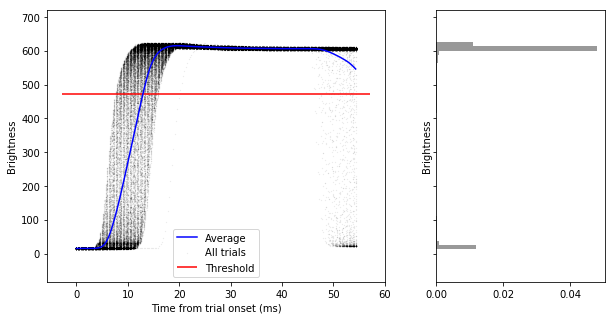

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw = {'width_ratios': [2, 1]}, sharey=True)

axes[0].scatter(df['TrialTime']/1000, df['SensorBrightness'], c='k', s=.1, alpha=.1, label='All trials')
axes[0].plot(avg_trialtime/1000, avg_brightness, c='b', label='Average')
axes[0].hlines([vrl.perc_range(df['SensorBrightness'], .75)], *axes[0].get_xlim(), 'r', label='Threshold')
sns.distplot(df['SensorBrightness'], ax=axes[1], vertical=True, hist_kws={'color': 'k'}, kde_kws={'alpha': 0})
for ax in axes:
    ax.set(ylabel='Brightness')
    
axes[0].set_xlabel('Time from trial onset (ms)')
axes[0].legend()
plt.show()

## Latencies

In [23]:
latencies = vrl.get_display_latencies(df_data)

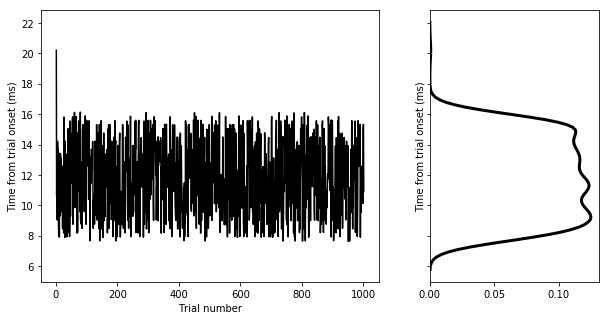

In [24]:
fig, axes= plt.subplots(1, 2, figsize=(10, 5), gridspec_kw = {'width_ratios': [2, 1]}, sharey=True)

axes[0].plot(df['Trial'].unique(), latencies/1000, c='k')
sns.distplot(latencies/1000, hist=False, color="k", kde_kws={"linewidth": 3, "alpha": 1}, ax=axes[1], vertical=True)
for ax in axes:
    ax.set(ylabel='Time from trial onset (ms)')
axes[0].set_xlabel('Trial number')
plt.show()

---

## Signale file analysis applied to all data files

In [39]:
path_fig + df_params_all[df_params_all.Session == current_session[0]].Filename[0] + '.png'

'../../Figures/displaydisplay_20180830_124242.csv.png'

0


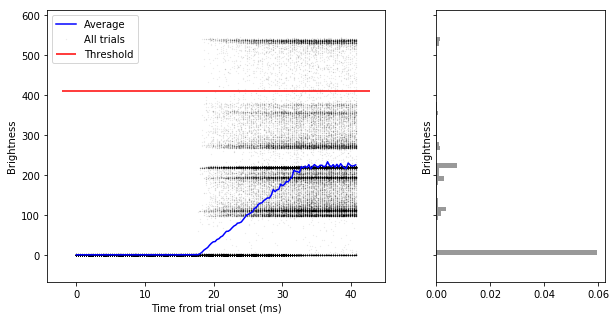

1


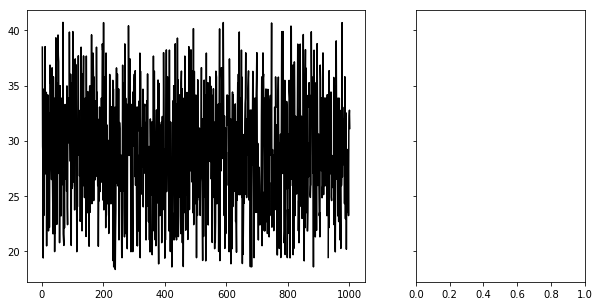

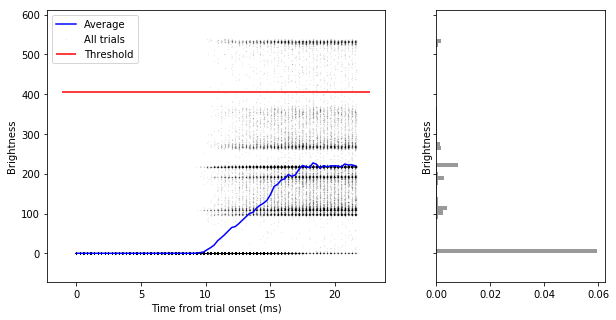

2


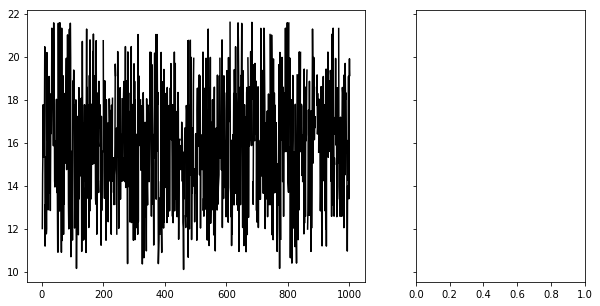

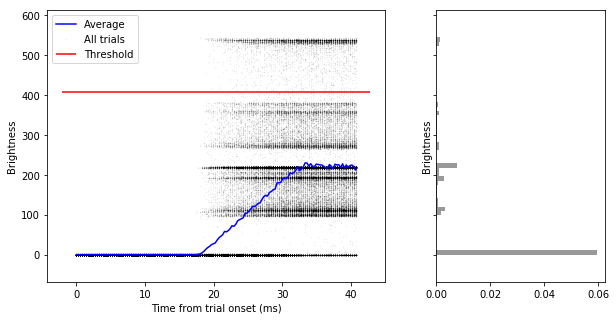

3


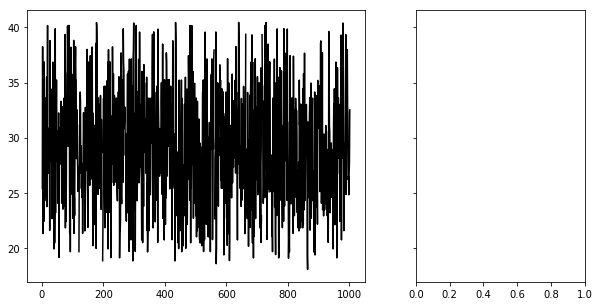

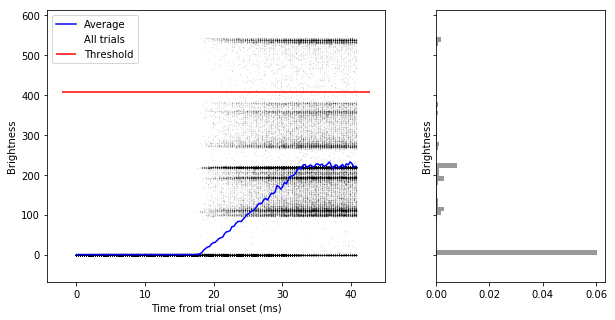

4


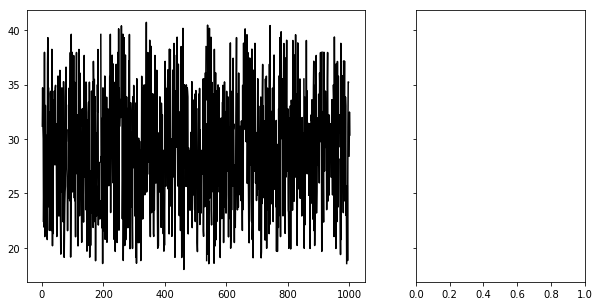

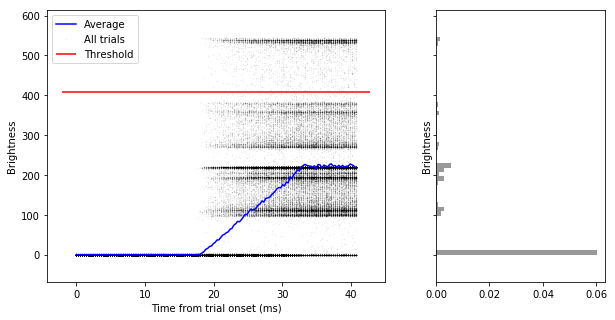

5


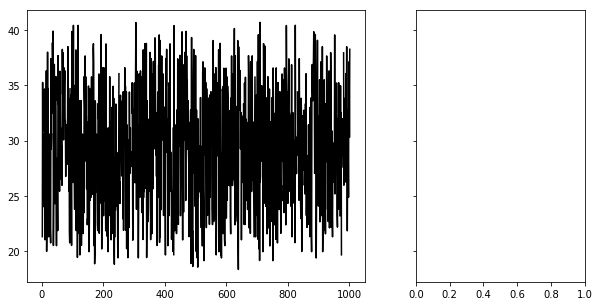

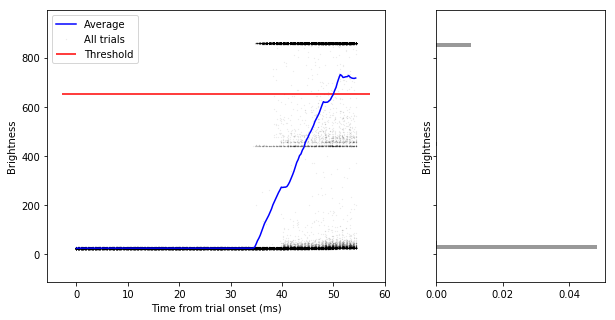

6


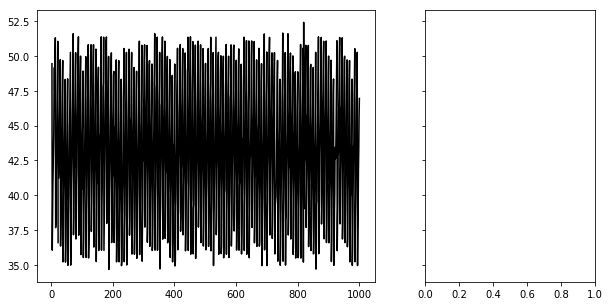

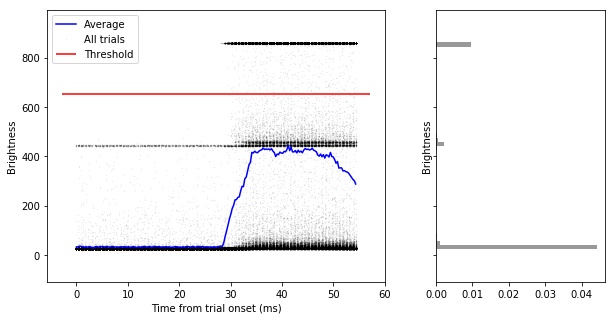

7


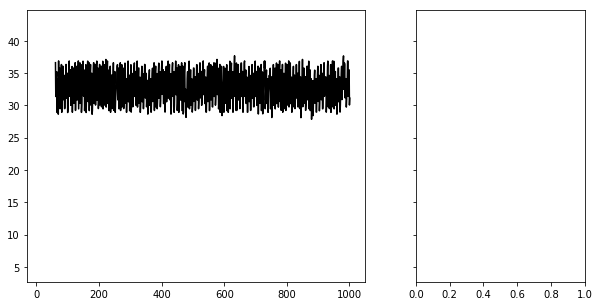

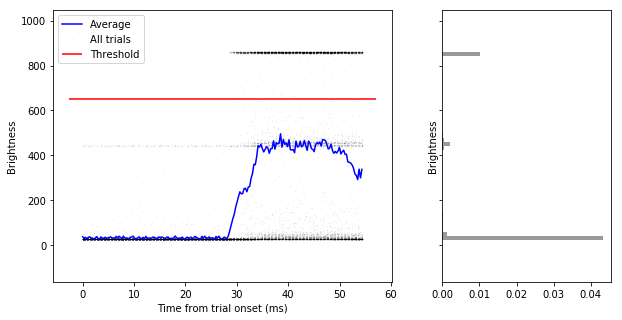

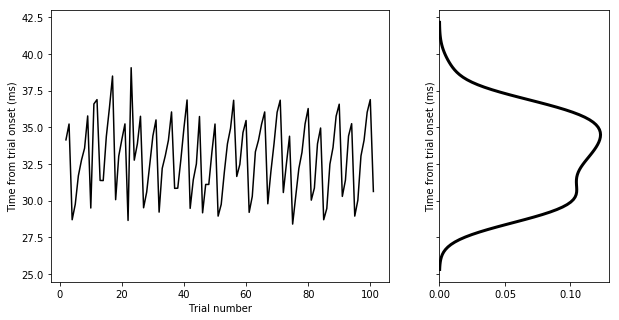

8


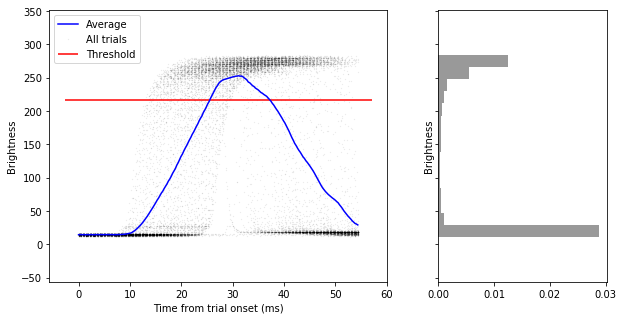

9


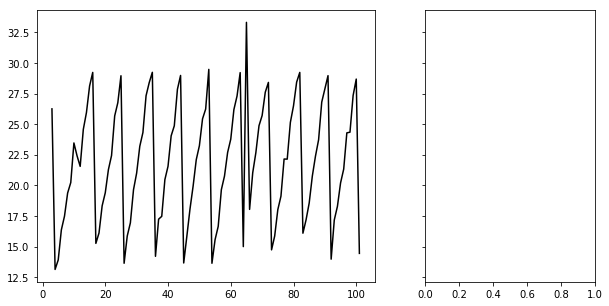

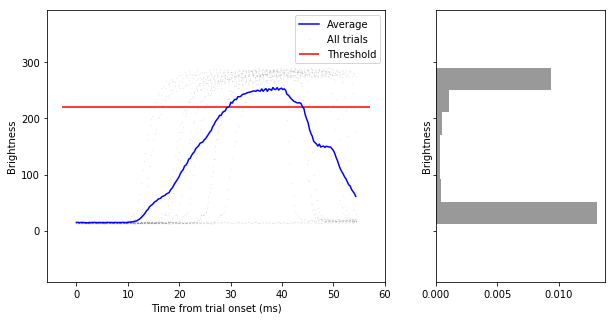

10


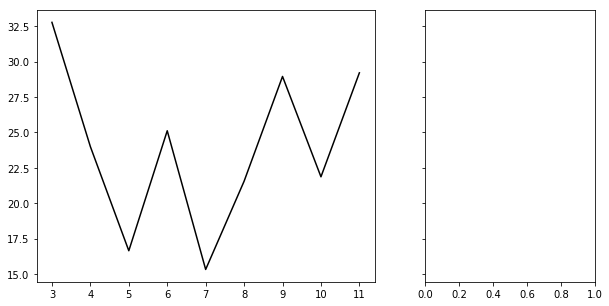

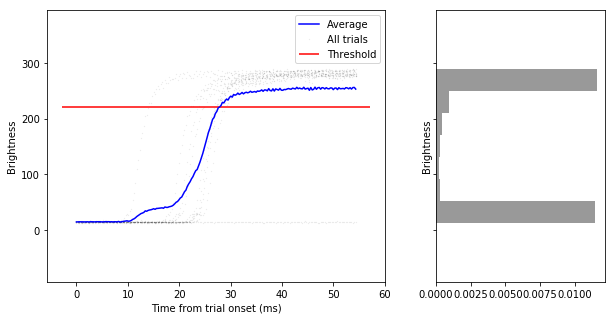

11


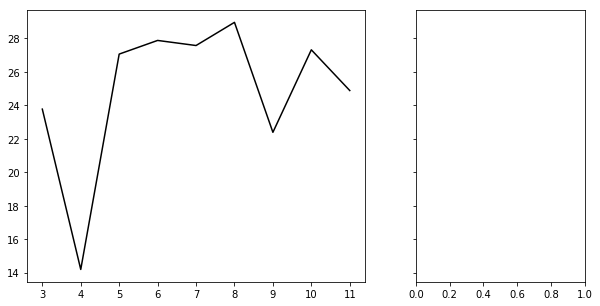

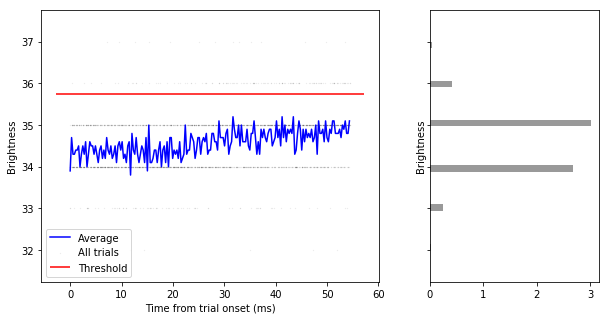

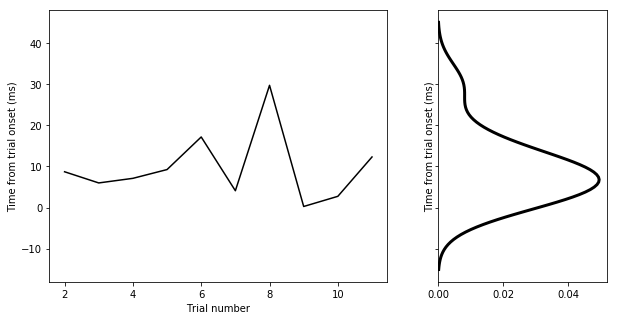

12


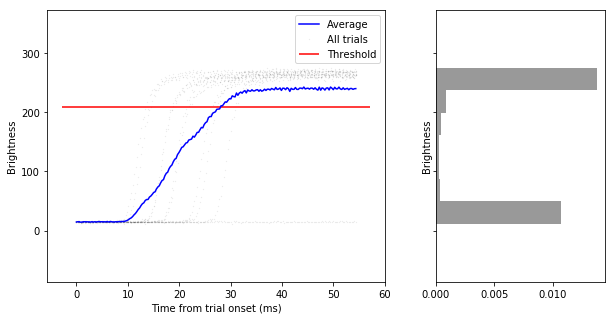

13


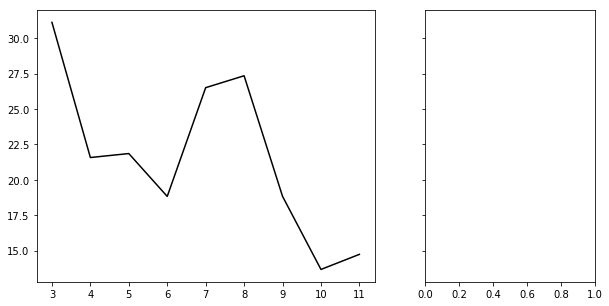

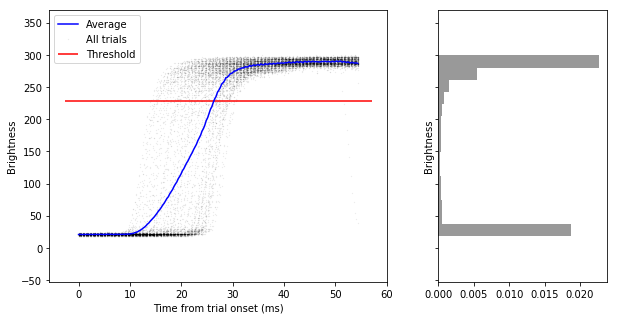

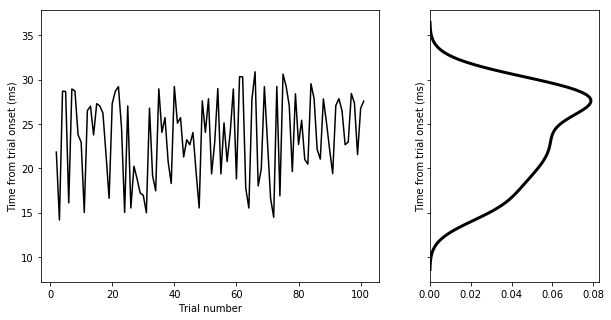

14


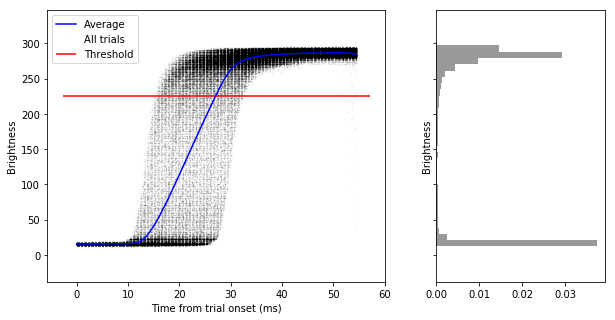

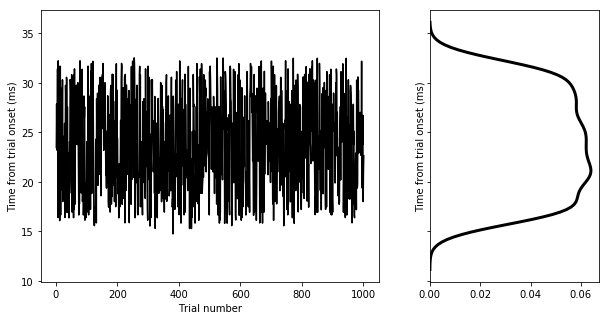

15


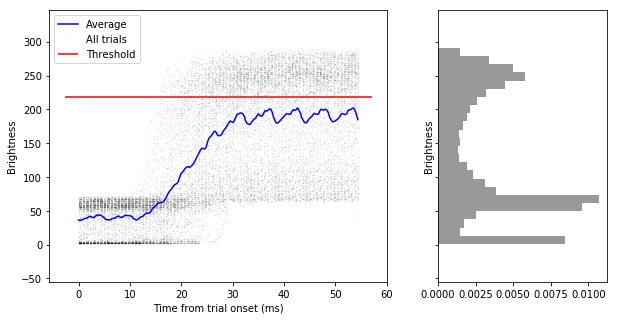

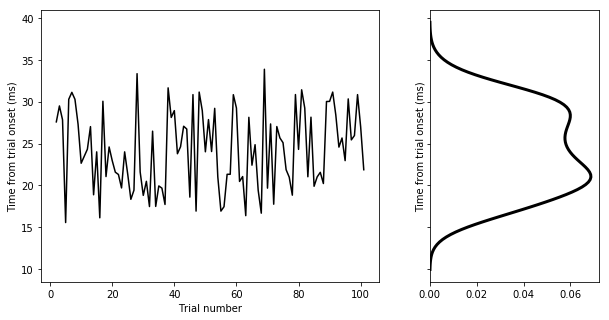

16


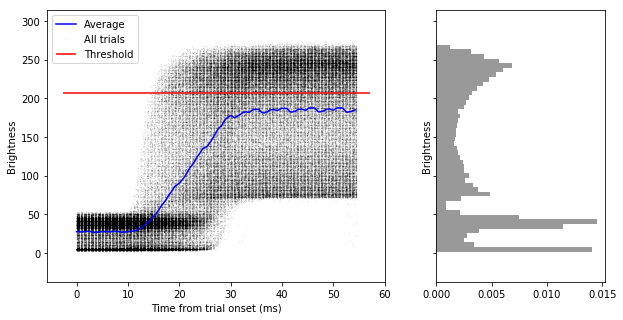

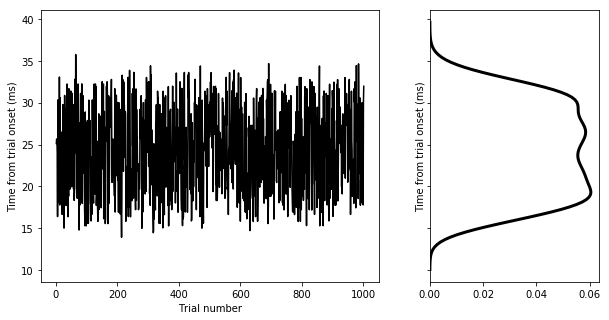

17


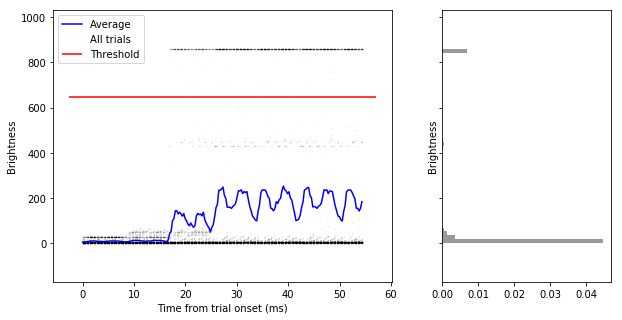

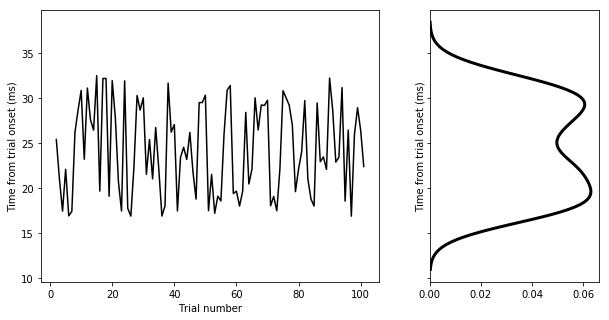

18


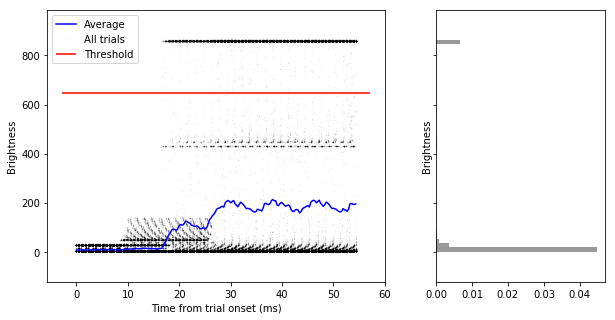

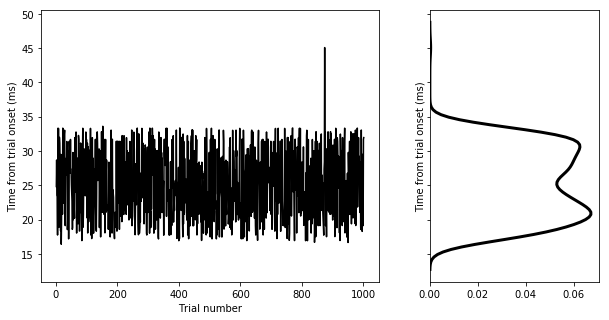

19


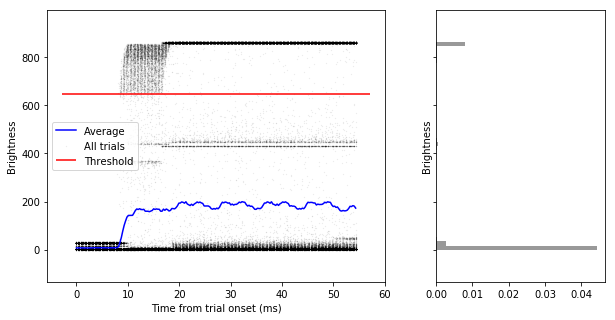

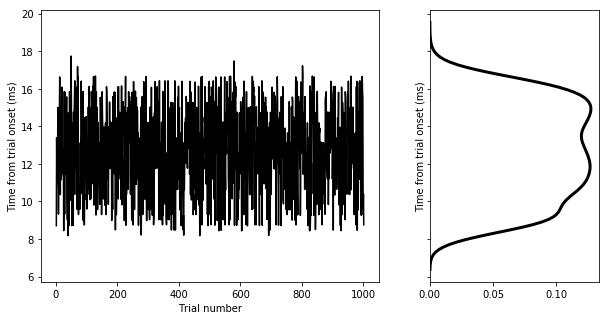

20


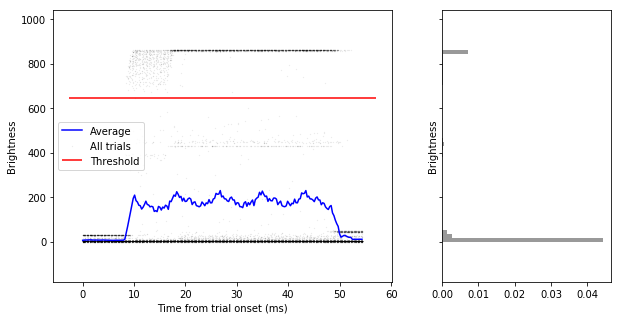

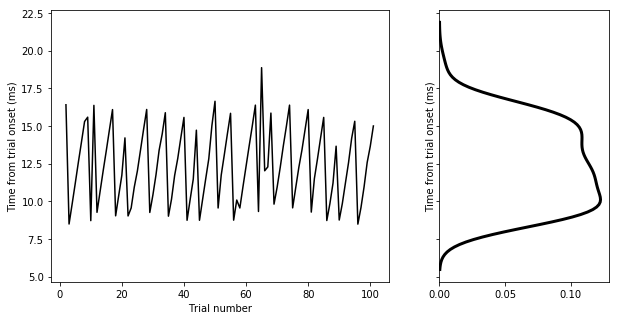

21


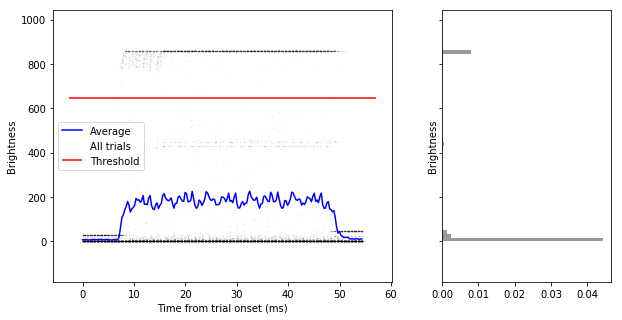

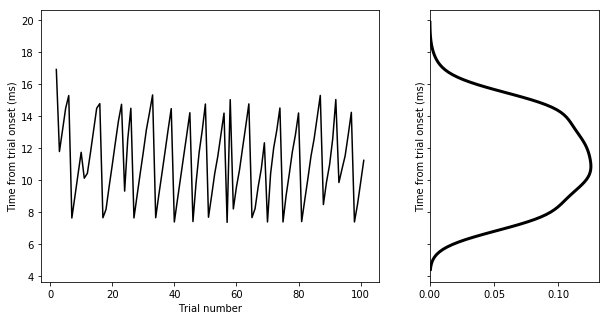

22


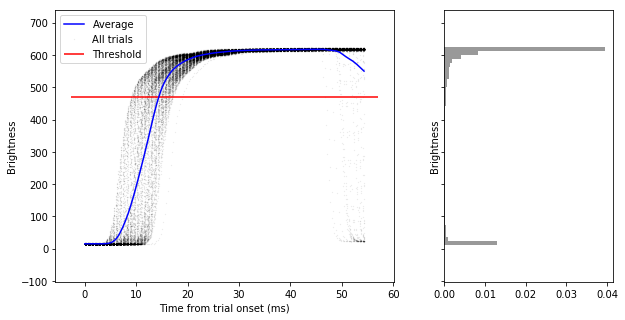

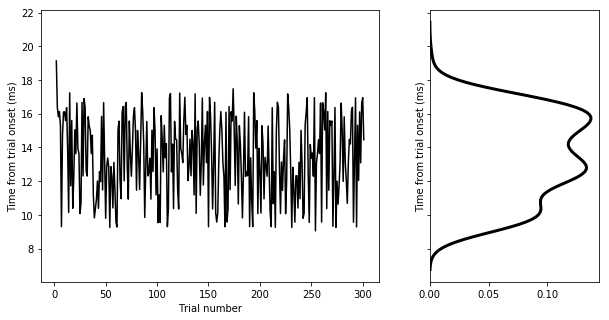

23


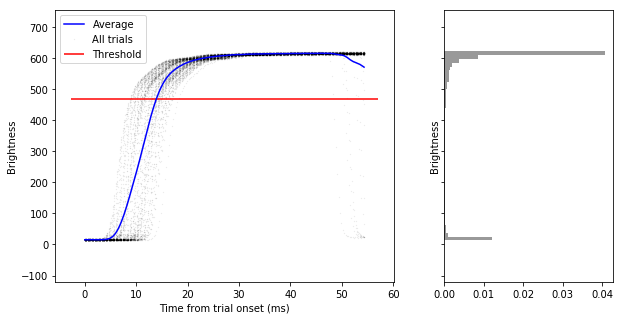

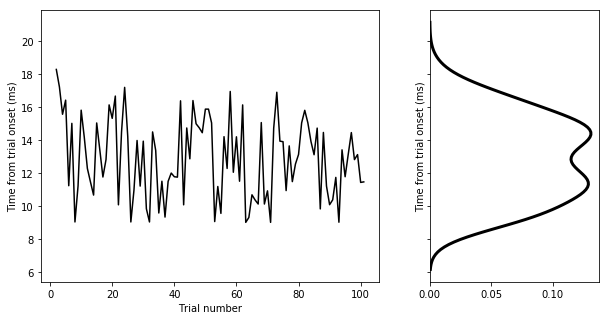

24


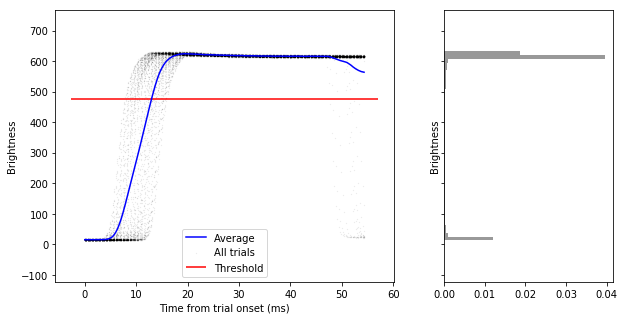

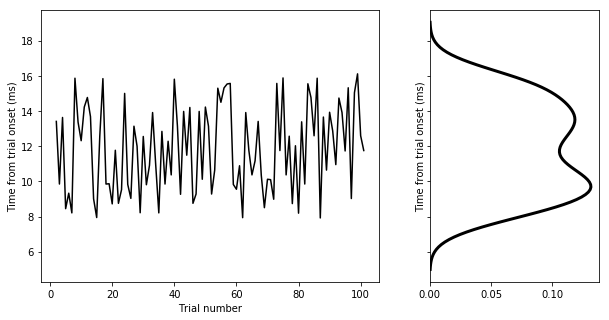

25


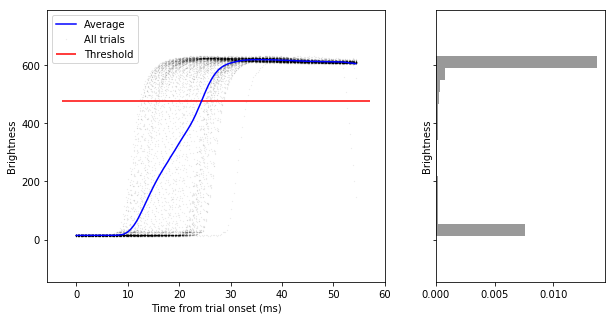

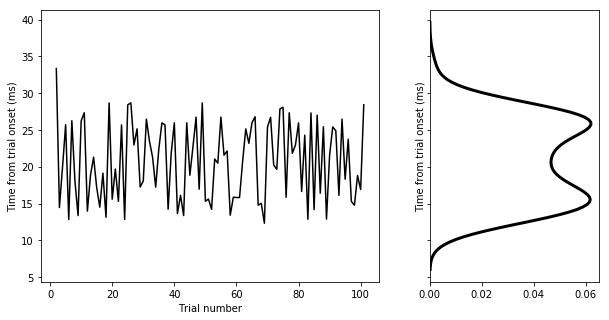

26


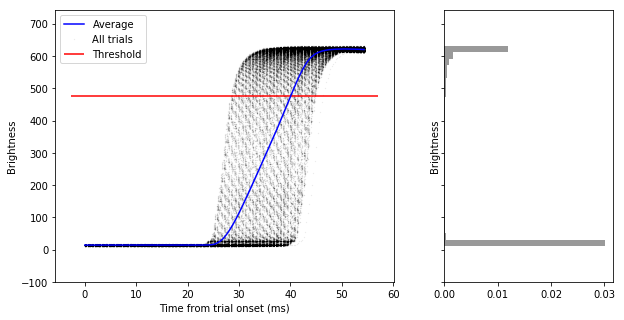

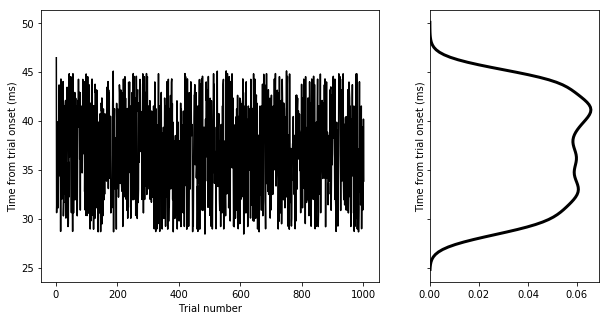

27


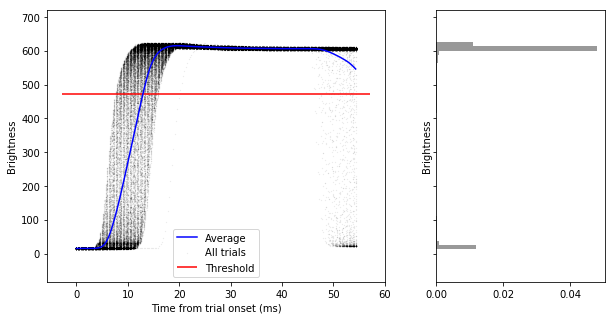

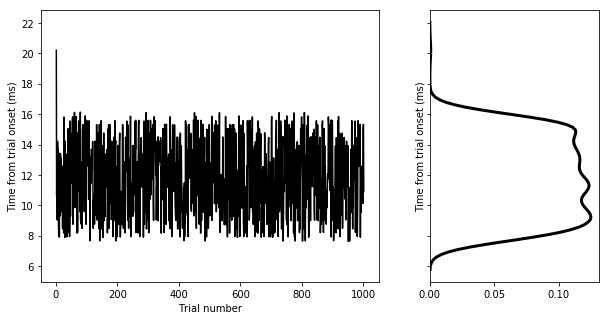

In [8]:
for name, df in df_data_all.groupby('Session'):
    print(name)
    current_session = df.Session.unique()[0]

    try: 
        df = df.copy()
        df['TrialTime'] = df.groupby('Trial').Time.apply(lambda x: x - x.min())
        df['TrialIndex'] = df.groupby('Trial').cumcount()

        avg_brightness = df.groupby('TrialIndex').SensorBrightness.mean().values
        avg_trialtime = df.groupby('TrialIndex').TrialTime.mean().values

        fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw = {'width_ratios': [2, 1]}, sharey=True)

        axes[0].scatter(df['TrialTime']/1000, df['SensorBrightness'], c='k', s=.1, alpha=.1, label='All trials')
        axes[0].plot(avg_trialtime/1000, avg_brightness, c='b', label='Average')
        axes[0].hlines([vrl.perc_range(df['SensorBrightness'], .75)], *axes[0].get_xlim(), 'r', label='Threshold')
        sns.distplot(df['SensorBrightness'], ax=axes[1], vertical=True, hist_kws={'color': 'k'}, kde_kws={'alpha': 0})
        for ax in axes:
            ax.set(ylabel='Brightness')

        axes[0].set_xlabel('Time from trial onset (ms)')
        axes[0].legend()
        
        plt.savefig(path_fig + df_params_all[df_params_all.Session == current_session].Filename[0] + '_brightness.png')
#         plt.show()

        latencies = vrl.get_display_latencies(df)
        fig, axes= plt.subplots(1, 2, figsize=(10, 5), gridspec_kw = {'width_ratios': [2, 1]}, sharey=True)

        axes[0].plot(df['Trial'].unique(), latencies/1000, c='k')
        sns.distplot(latencies/1000, hist=False, color="k", kde_kws={"linewidth": 3, "alpha": 1}, ax=axes[1], vertical=True)
        for ax in axes:
            ax.set(ylabel='Time from trial onset (ms)')
        axes[0].set_xlabel('Trial number')
        
        plt.savefig(path_fig + df_params_all[df_params_all.Session == current_session].Filename[0] + '_latencies.png')
#         plt.show()
    
    except ValueError:
        print(ValueError)
        pass

---

## A dataframe for latency values

In [74]:
df_latency = pd.DataFrame()
for name, df in df_data_all.groupby('Session'):
    dff = pd.DataFrame(vrl.get_display_latencies(df))
    dff['Session'] = [name] * dff.shape[0]
    dff['Trial'] = dff.index
    dff['Latency'] = dff['DisplayLatency']
    dff.drop('DisplayLatency', axis=1, inplace=True)
    df_latency = df_latency.append(dff)

df_latency.reset_index(drop=True, inplace=True)

In [75]:
df_latency.tail()

,Session,Trial,Latency
14335,27,997,10640.0
14336,27,998,10120.0
14337,27,999,15040.0
14338,27,1000,15320.0
14339,27,1001,10912.0


---

## Aggregation analysis

In [76]:
df_data = df_data_all.copy()
df_params = df_params_all.copy()

Merge the df_data_all with df_latency

In [82]:
df_data_latency = pd.merge(df_data_all, df_latency, on=['Session', 'Trial'])
df_data_latency.tail()

,Trial,Time,SensorBrightness,Session,Latency
2547995,1001,143434284,604,27,10912.0
2547996,1001,143434556,606,27,10912.0
2547997,1001,143434828,604,27,10912.0
2547998,1001,143435100,604,27,10912.0
2547999,1001,143435372,606,27,10912.0


Merge the df_params_all with df_latency

In [86]:
df_params_latency = pd.merge(df_latency, df_params, on='Session')
df_params_latency.head()

,Session,Trial,Latency,Experiment,Date,Time,Width,Height,Depth,Rate,Monitors,Trials,Filename
0,0,2,38488.0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,display_20180830_115317
1,0,3,29504.0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,display_20180830_115317
2,0,4,28664.0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,display_20180830_115317
3,0,5,19376.0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,display_20180830_115317
4,0,6,34672.0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,display_20180830_115317


Merge the df_data_latency with the df_params_all

In [83]:
df = pd.merge(df_data_latency, df_params, on='Session')
df = df.rename(columns={'Time_x': 'Time', 'Time_y': 'Exp_Time'})
df.head()

,Trial,Time,SensorBrightness,Session,Latency,Experiment,Date,Exp_Time,Width,Height,Depth,Rate,Monitors,Trials,Filename
0,2,813068,0,0,38488.0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,display_20180830_115317
1,2,813340,0,0,38488.0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,display_20180830_115317
2,2,813612,0,0,38488.0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,display_20180830_115317
3,2,813884,0,0,38488.0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,display_20180830_115317
4,2,814156,0,0,38488.0,DisplayExperiment,30.08.2018,11:51:10,1920,1080,32,60,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,1000,display_20180830_115317


---

Now we have different dataframes available, we can chose one and perform out analysis on it

In [116]:
df = df_params_latency.copy()

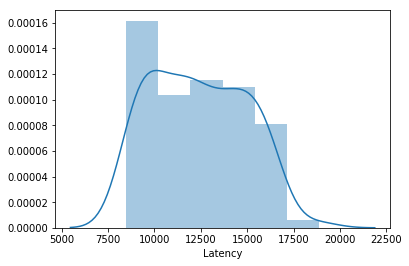

In [96]:
grp = df.groupby('Session')
dff = grp.get_group(20)
sns.distplot(dff.Latency)

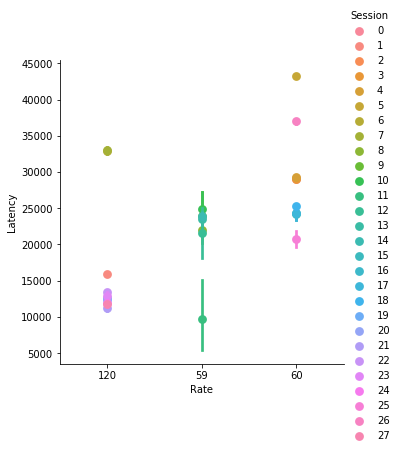

In [99]:
sns.catplot(x='Rate', y='Latency', hue='Session', kind="point", data=df)

## Same monitor, different parameters

In [176]:
df = df_params_latency.copy()

In [177]:
for ind, (name, dff) in enumerate(df.groupby('Monitors')):
    print(ind, name)

0 BNQ_BQ XL411_H6E00549SL0
1 SAM_SycMastr_H9XQB10798
2 SAM_SycMastr_H9XS904970
3 SAM_SycMastr_H9XS904970 | OTM_Optoa WXGA_Q8TV3170464
4 SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009


In [195]:
grp = df.groupby('Monitors')
name = list(grp)[0][0]
df_mon = grp.get_group(name)
df_mon.head()

,Session,Trial,Latency,Experiment,Date,Time,Width,Height,Depth,Rate,Monitors,Trials,Filename
9440,17,2,25416.0,DisplayExperiment,30.08.2018,18:23:28,1920,1080,32,60,BNQ_BQ XL411_H6E00549SL0,100,display_20180830_182344
9441,17,3,21040.0,DisplayExperiment,30.08.2018,18:23:28,1920,1080,32,60,BNQ_BQ XL411_H6E00549SL0,100,display_20180830_182344
9442,17,4,17472.0,DisplayExperiment,30.08.2018,18:23:28,1920,1080,32,60,BNQ_BQ XL411_H6E00549SL0,100,display_20180830_182344
9443,17,5,22120.0,DisplayExperiment,30.08.2018,18:23:28,1920,1080,32,60,BNQ_BQ XL411_H6E00549SL0,100,display_20180830_182344
9444,17,6,16952.0,DisplayExperiment,30.08.2018,18:23:28,1920,1080,32,60,BNQ_BQ XL411_H6E00549SL0,100,display_20180830_182344


Monitor: BNQ_BQ XL411_H6E00549SL0


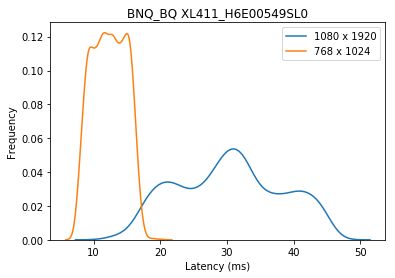

Monitor: SAM_SycMastr_H9XQB10798


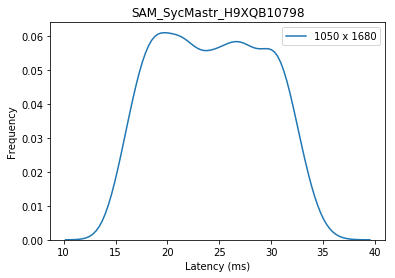

Monitor: SAM_SycMastr_H9XS904970
Monitor: SAM_SycMastr_H9XS904970 | OTM_Optoa WXGA_Q8TV3170464
Monitor: SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009


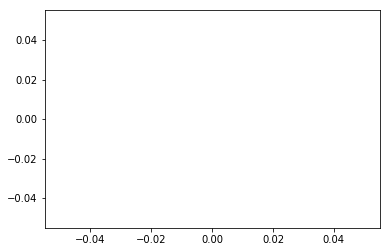

In [204]:
for name, df_mon in df.groupby('Monitors'):
    print('Monitor:', name)
    try:
        for (h, w), df_res in df_mon.groupby(['Height','Width']):
            sns.distplot(df_res.Latency / 1000, hist=False, label=h + ' x ' + w)
        
        plt.title(name)
        plt.xlabel('Latency (ms)')
        plt.ylabel('Frequency')
        plt.legend()
        plt.savefig('C:/Users/Mohammad Bashiri/Desktop/single-mon' + name + '.png')
        plt.show()
    except ValueError:
        pass

Monitor: BNQ_BQ XL411_H6E00549SL0


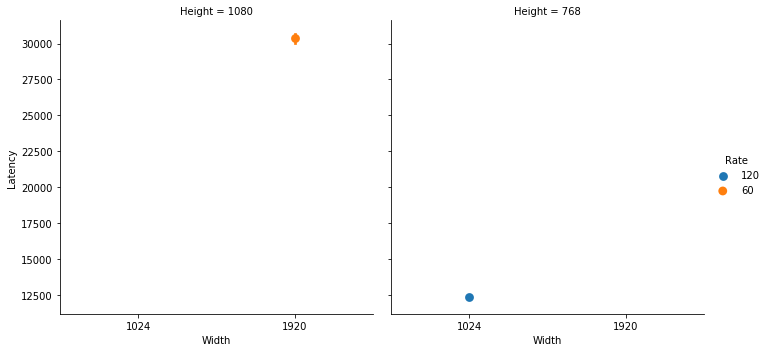

Monitor: SAM_SycMastr_H9XQB10798


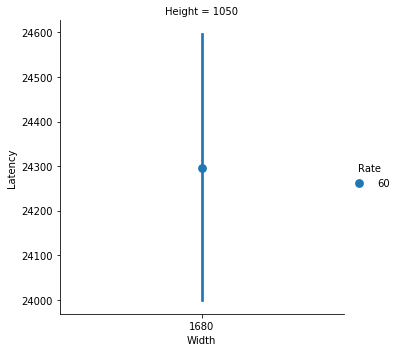

Monitor: SAM_SycMastr_H9XS904970


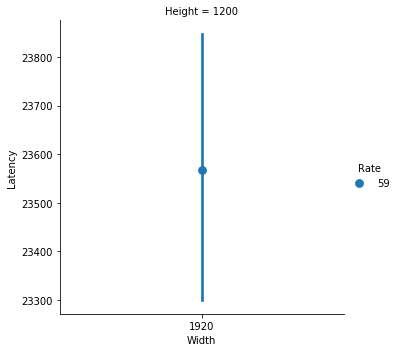

Monitor: SAM_SycMastr_H9XS904970 | OTM_Optoa WXGA_Q8TV3170464


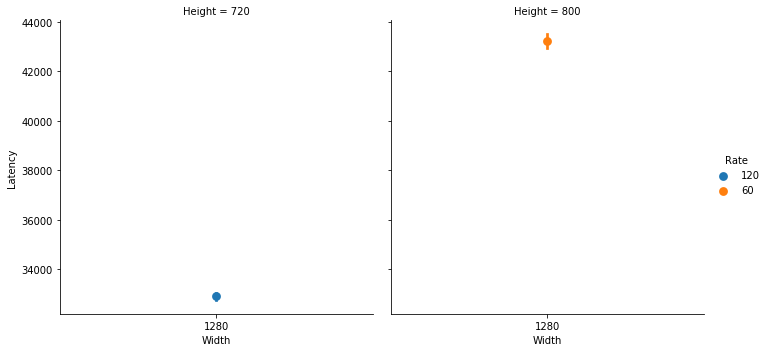

Monitor: SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009


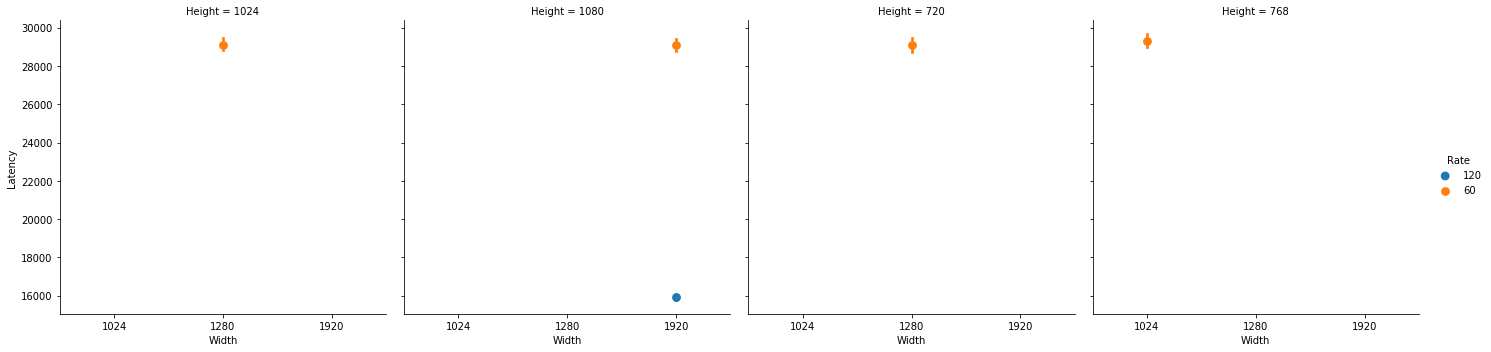

In [208]:
for name, df_mon in df.groupby('Monitors'):
    print('Monitor:', name)
    try:
        sns.catplot(x='Width', y='Latency', hue='Rate', col='Height', kind="point", data=df_mon)
        
#         plt.title(name)
#         plt.legend()
#         plt.savefig('C:/Users/Mohammad Bashiri/Desktop/single-mon' + name + '.png')
        plt.show()
    except ValueError:
        pass

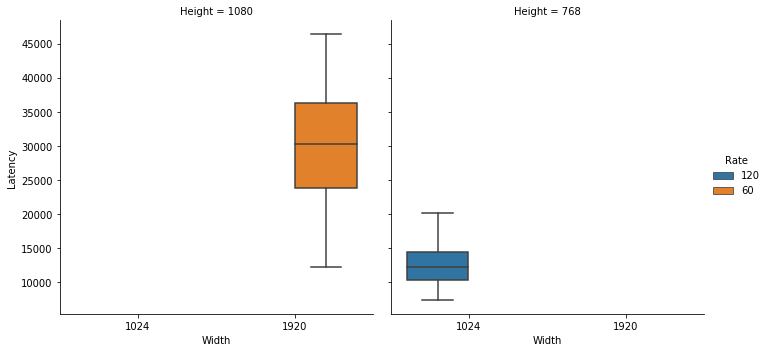

In [196]:
sns.catplot(x='Width', y='Latency', hue='Rate', col='Height', kind="box", data=df_mon)

## Same paramet different monitor

In [172]:
df = df_params_latency.copy()

In [173]:
grp = df.groupby(['Height', 'Width'])

('1024', '1280') ['SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009']
('1050', '1680') ['SAM_SycMastr_H9XQB10798']
('1080', '1920') ['SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009' 'BNQ_BQ XL411_H6E00549SL0']
('1200', '1920') ['SAM_SycMastr_H9XS904970']
('720', '1280') ['SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009'
 'SAM_SycMastr_H9XS904970 | OTM_Optoa WXGA_Q8TV3170464']
('768', '1024') ['SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009' 'BNQ_BQ XL411_H6E00549SL0']
('800', '1280') ['SAM_SycMastr_H9XS904970 | OTM_Optoa WXGA_Q8TV3170464']


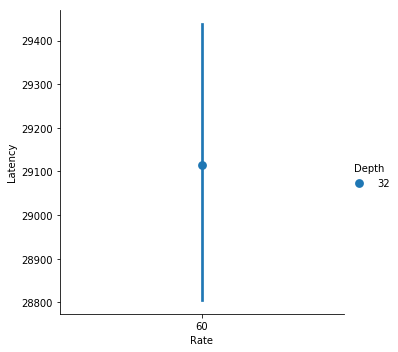

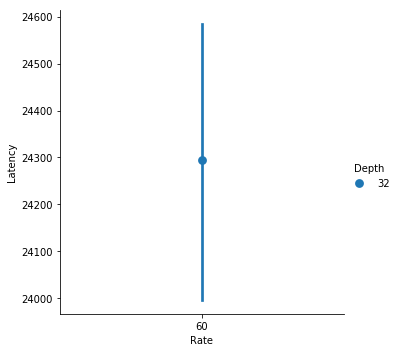

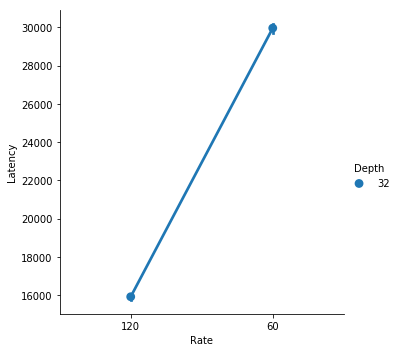

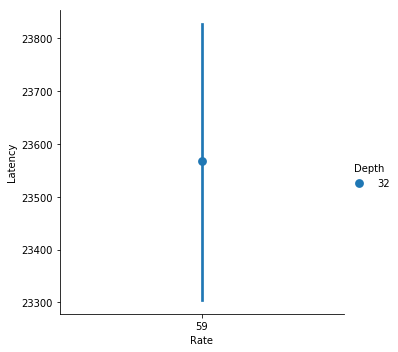

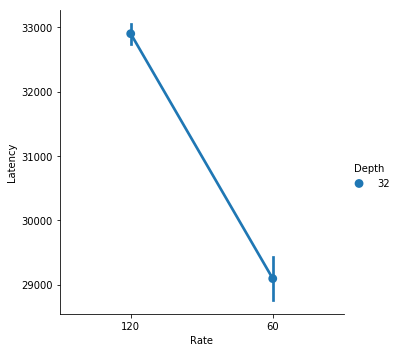

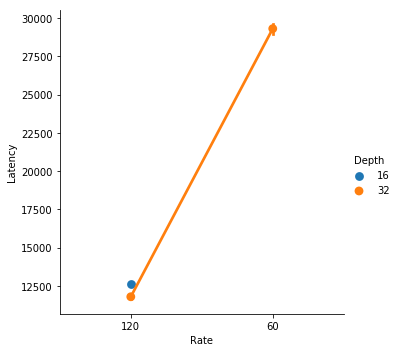

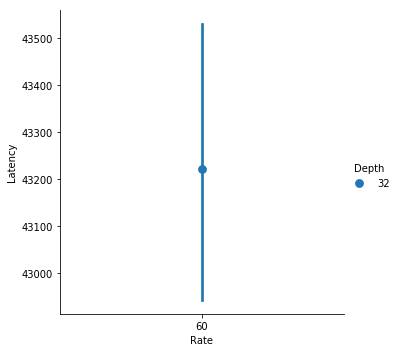

In [175]:
for name, dff in grp:
    print(name, dff.Monitors.unique())
    sns.catplot(x='Rate', y='Latency', hue='Depth', kind='point', data=dff)